In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
%matplotlib inline

In [2]:
safe_data = pd.read_csv('C:\\Users\\Owner\\Downloads\\safe_driving.csv')

In [3]:
safe_data.isnull().sum().sort_values(ascending= False)

Miles_driven_annually_bucket    8
Miles_driven_annually           8
State                           0
annual_claims                   0
target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
Vehical_type                    0
Marital_Status                  0
credit_history_bucket           0
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
ID                              0
dtype: int64

In [4]:
safe_data.corr()

,ID,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
ID,1.000000,0.000279,-0.001689,-0.007200,-0.003985,0.010630,-0.002166,0.002736
target,0.000279,1.000000,-0.009582,0.002122,-0.000841,0.002050,-0.003993,-0.005585
EngineHP,-0.001689,-0.009582,1.000000,-0.307950,-0.329912,0.251269,0.042690,-0.001674
credit_history,-0.007200,0.002122,-0.307950,1.000000,0.410206,-0.377410,-0.162552,0.003352
Years_Experience,-0.003985,-0.000841,-0.329912,0.410206,1.000000,-0.393653,-0.302161,0.001519
annual_claims,0.010630,0.002050,0.251269,-0.377410,-0.393653,1.000000,0.109352,-0.000370
Miles_driven_annually,-0.002166,-0.003993,0.042690,-0.162552,-0.302161,0.109352,1.000000,-0.000841
size_of_family,0.002736,-0.005585,-0.001674,0.003352,0.001519,-0.000370,-0.000841,1.000000


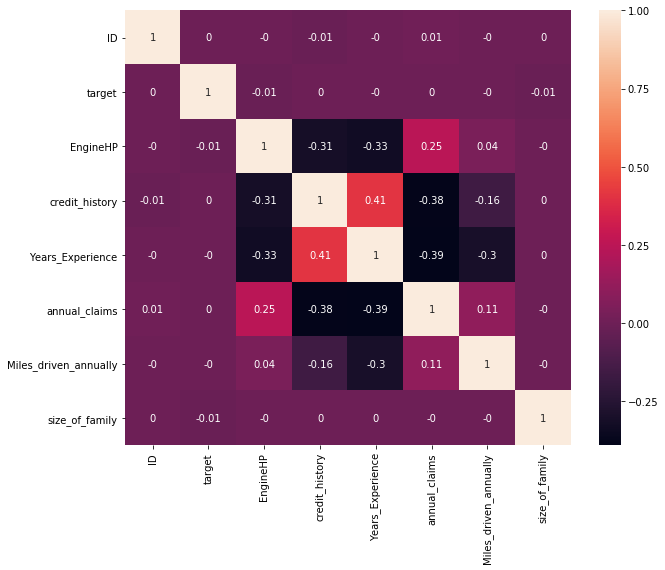

In [5]:
plt.subplots(figsize=(10,8))
correlation_matrix = safe_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

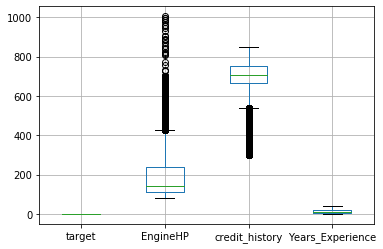

In [10]:
boxplot = safe_data.boxplot(column=['target','EngineHP','credit_history','Years_Experience'])

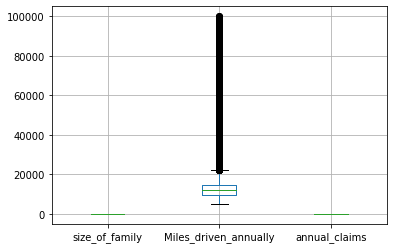

In [33]:
boxplot = safe_data.boxplot(column=['size_of_family','Miles_driven_annually','annual_claims'])

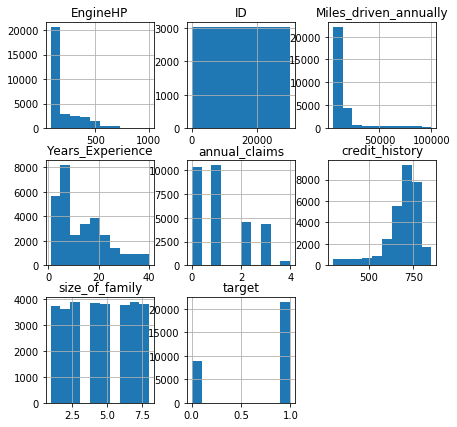

In [17]:
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
safe_data.hist(ax=ax)
plt.show()

In [34]:
discrete =["State","Vehical_type"]

continuous = ["size_of_family","Miles_driven_annually","EngineHP","annual_claims","credit_history", "Years_Experience","Age_bucket"]

categotical = ["Gender","Marrital_Status","credit_history-bucket","EngineHP_bucket","Miles_driven_annually_bucket"]

In [35]:
#separating the dependent variable y
y = safe_data['target']


In [36]:
#defining the independent variables
x = safe_data.drop(['Vehical_type','EngineHP_bucket','target','Years_Experience_bucket','ID','Miles_driven_annually_bucket','State','Age_bucket'],axis = 1)


In [37]:
#handling null values under our miles_driven_annually column
mean = x["Miles_driven_annually"].mean()
std =x["Miles_driven_annually"].std()
is_null = x["Miles_driven_annually"].isnull().sum()
# compute random numbers between the mean, std and is_null
try:
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
except:
    rand_age = 0
# fill NaN values in Age column with random values generated
age_slice = x["Miles_driven_annually"].copy()
age_slice[np.isnan(age_slice)] = rand_age
x["Miles_driven_annually"] = age_slice
x["Miles_driven_annually"] = x["Miles_driven_annually"].astype(int)

In [38]:
#lets confirm if we still have missing values in Miles_driven_annually by printing  null values of x
x.isnull().sum()

Gender                   0
EngineHP                 0
credit_history           0
Years_Experience         0
annual_claims            0
Marital_Status           0
Miles_driven_annually    0
size_of_family           0
credit_history_bucket    0
dtype: int64

In [39]:
# Convering credit history bucket feature into numeric data
ports = {"Very Poor": 0, "Fair": 1, "Good": 2,"Very Good": 3,"Exceptional": 4}
x['credit_history_bucket'] = x['credit_history_bucket'].map(ports)

#converting gender to 0 and 1
gender = {"M":0, "F":1}
x["Gender"] = x["Gender"].map(gender)

#converting marital status to 0 and 1
marital = {"Married":0, "Single":1}
x["Marital_Status"] = x["Marital_Status"].map(marital)

In [40]:
#Spliting the dataset to training set and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 15, shuffle=True)

# KNN Model

In [234]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [235]:
y_pred= knn.predict(x_test)

In [236]:
from sklearn.metrics import accuracy_score

#accuracy score
print(accuracy_score(y_test, y_pred))

0.6618165784832452


In [237]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#confusion matrix
predictions = cross_val_predict(knn, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[  715,  5443],
       [ 1781, 13229]], dtype=int64)

In [238]:
from sklearn.metrics import log_loss

#logarthmic loss
log_loss(y_test, y_pred, eps=1e-15)

11.680650289495224

In [239]:
from sklearn.metrics import f1_score

#f1 score
f1_score(y_train, predictions)

0.785523424974764

In [298]:
from sklearn.metrics import roc_auc_score

#area under curve
probs = knn.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print(auc)

0.5016660840599982


# Logistic Regression

In [274]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
y_pred = logreg.predict(x_test)

In [276]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.7039241622574955


In [277]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#confusion matrix
predictions = cross_val_predict(logreg, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[    0,  6158],
       [    0, 15010]], dtype=int64)

In [278]:
from sklearn.metrics import log_loss

#logarthmic loss
log_loss(y_test, y_pred, eps=1e-15)

10.226333897203219

In [279]:
from sklearn.metrics import f1_score

#f1 score
f1_score(y_train, predictions)

0.8297860578251975

In [297]:
#area under curve
probs = logreg.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print(auc)

0.5013951078296506


# Decision Tree

In [281]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_leaf_nodes=10)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [282]:
y_pred = classifier.predict(x_test)

In [283]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.7014991181657848


In [284]:
#confusion matrix
predictions = cross_val_predict(classifier, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[   22,  6136],
       [   49, 14961]], dtype=int64)

In [285]:
from sklearn.metrics import log_loss

#logarthmic loss
log_loss(y_test, y_pred, eps=1e-15)

10.310090278192732

In [286]:
from sklearn.metrics import f1_score

#f1 score
f1_score(y_train, predictions)

0.8287035754839782

In [296]:
#area under curve
probs = classifier.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print(auc)

0.5012345800649644


# Random Forest

In [288]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(max_leaf_nodes=18, n_estimators=16, random_state=0)
rnd_clf.fit(x_train, y_train)
y_pred = rnd_clf.predict(x_test)

In [289]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.7040343915343915


In [290]:
#confusion matrix
predictions = cross_val_predict(rnd_clf, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[    8,  6150],
       [   10, 15000]], dtype=int64)

In [291]:
from sklearn.metrics import log_loss

#logarthmic loss
log_loss(y_test, y_pred, eps=1e-15)

10.22252636030015

In [292]:
from sklearn.metrics import f1_score

#f1 score
f1_score(y_train, predictions)

0.8296460176991151

In [295]:
#area under curve
probs = rnd_clf.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print(auc)

0.5014104406068841


# SVM

In [266]:
from sklearn.svm import SVC

svm= SVC()
svm.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [259]:
y_pred = svm.predict(x_test)

In [157]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.7039241622574955


In [264]:
#confusion matrix
predictions = cross_val_predict(svm, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[    0,  6158],
       [    0, 15010]], dtype=int64)

In [194]:
from sklearn.metrics import log_loss

#logarthmic loss
log_loss(y_test, y_pred, eps=1e-15)

10.226333897203219

In [265]:
from sklearn.metrics import f1_score

#f1 score
f1_score(y_train, predictions)

0.8297860578251975

# Naive bayes 

In [1]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

NameError: name 'x_train' is not defined

In [309]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.7035934744268078


In [310]:
#confusion matrix
predictions = cross_val_predict(gaussian, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[    3,  6155],
       [    7, 15003]], dtype=int64)

In [311]:
#f1 score
f1_score(y_train, predictions)

0.829628400796284

In [313]:
#area under curve
probs = gaussian.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print(auc)

0.49457785191405534


In [312]:
#logarthmic loss
log_loss(y_test, y_pred, eps=1e-15)

10.237755450243863